<a href="https://colab.research.google.com/github/FabienNbx/cnn_test/blob/main/python_cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) IMPORTATION DES DONNÉES**

In [26]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.
# y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
# y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

**2) ANALYSE DES DONNÉES** **texte en gras**


In [27]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape) #60000 images de taille 28*28
print('Testing data shape : ', test_X.shape, test_Y.shape) #10000 images de taille 28*28

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


ANALYSE - Comptage du nombre de classes différentes

In [28]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


ANALYSE - Affichage d'une image du jeu d'entrainement et d'une image du jeu de test

Text(0.5, 1.0, 'Class label : 9')

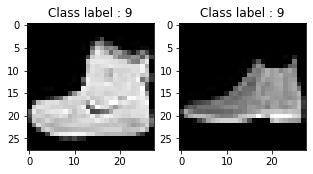

In [29]:
plt.figure(figsize=[5,5])

img_position = 0

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[img_position,:,:], cmap='gray')
plt.title("Class label : {}".format(train_Y[img_position]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[img_position,:,:], cmap='gray')
plt.title("Class label : {}".format(test_Y[img_position]))

ANALYSE - Convertion de chaque image en matrice de dimension 28 * 28 * 1

In [30]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

ANALYSE - Convertion en en de int en float, puis convetion des valeurs de [0 : 255] à [0 : 1]

In [31]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

ANALYSE - Convertion de la classe en un vecteur de type 'one-hot encoding', c'est à dire l'indice de la seule valeur à 1 correspond à la classe (exemple : [0 0 0 0 0 0 0 0 0 1] pour une classe 9)

In [32]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
print(train_Y_one_hot)

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


ANALYSE - Partitionnement des données avec une utilisation de 80% des données d'entrainements et 20% des données de test pour validation

In [33]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

**3) RÉSEAU**

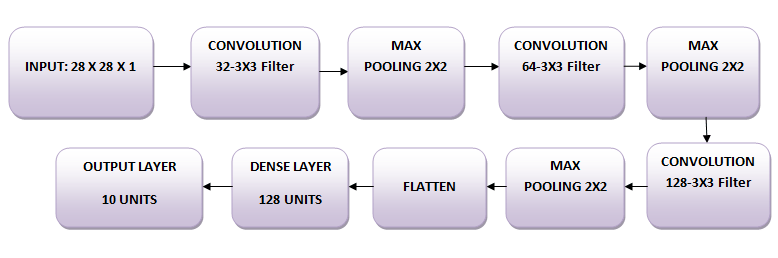

RÉSEAU - Importation des différentes librairies

In [46]:
import keras
import tensorflow as tf 
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

RÉSEAU - Définition de constantes

In [47]:
batch_size = 64
epochs = 20
num_classes = 10

RÉSEAU - Définition du réseau séquentiel en suivant le schéma vu précédemment

In [48]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

RÉSEAU - Compilation du réseau en utilisant l'optimiseur Adam

In [49]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

RÉSEAU - Visualisation du réseau

In [50]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

RÉSEAU - Entraînement du modèle sur 20 epochs

In [51]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 94s 124ms/step - loss: 0.4642 - accuracy: 0.8302 - val_loss: 0.3506 - val_accuracy: 0.8714
Epoch 2/20
750/750 [==============================] - 95s 127ms/step - loss: 0.2907 - accuracy: 0.8935 - val_loss: 0.3070 - val_accuracy: 0.8858
Epoch 3/20
750/750 [==============================] - 94s 125ms/step - loss: 0.2456 - accuracy: 0.9094 - val_loss: 0.2489 - val_accuracy: 0.9104
Epoch 4/20
750/750 [==============================] - 95s 127ms/step - loss: 0.2128 - accuracy: 0.9213 - val_loss: 0.2417 - val_accuracy: 0.9160
Epoch 5/20
750/750 [==============================] - 95s 127ms/step - loss: 0.1845 - accuracy: 0.9309 - val_loss: 0.2462 - val_accuracy: 0.9117
Epoch 6/20
750/750 [==============================] - 95s 126ms/step - loss: 0.1609 - accuracy: 0.9392 - val_loss: 0.2340 - val_accuracy: 0.9197
Epoch 7/20
750/750 [==============================] - 94s 125ms/step - loss: 0.1429 - accuracy: 0.9464 - val_loss: 0.2486 - val_ac

**4) ÉVALUATION DU MODÈLE**

In [52]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4698415994644165
Test accuracy: 0.9147999882698059


ÉVALUATION - Affichage des graphiques pour évaluer

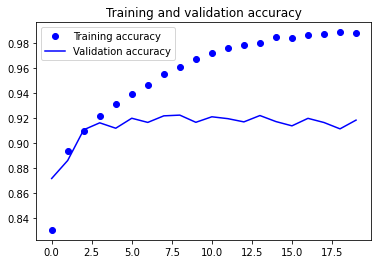

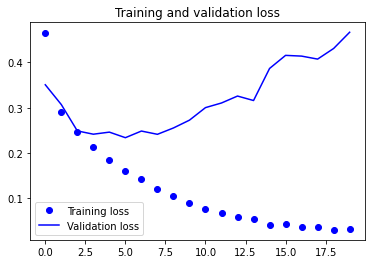

In [55]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**5) DROPOUT**

DROPOUT - Le dropout pour ne pas "sur-apprendre"

In [56]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.summary()

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

DROPOUT - Sauvegarde du modèle

In [57]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


**6) ÉVALUATION DU MODÈLE AVEC DROPOUT**

313/313 [==============================] - 6s 20ms/step - loss: 0.2190 - accuracy: 0.9194
Test loss: 0.21897214651107788
Test accuracy: 0.9193999767303467


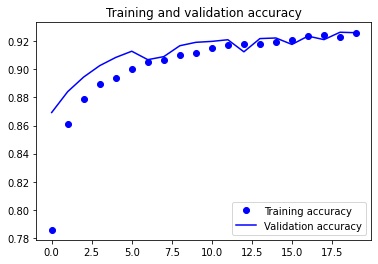

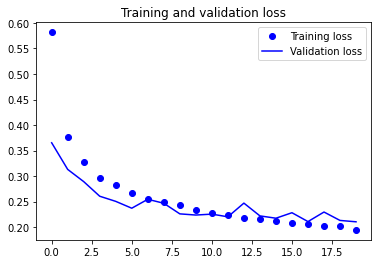

In [59]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**7) PRÉDICTION DE LABELS**

In [60]:
predicted_classes = fashion_model.predict(test_X)

PRÉDICTION - Convertion du vecteur en une classe entre 0 et 9

In [61]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

predicted_classes.shape, test_Y.shape

((10000,), (10000,))

PRÉDICTION - Les corrects :

Found 9152 correct labels


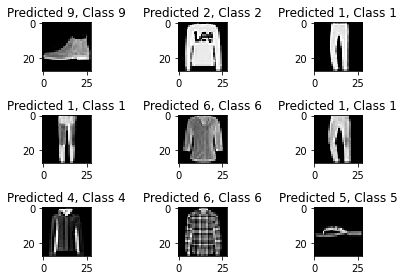

In [64]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found " + str(len(correct)) + " correct labels")
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

PRÉDICTION - Les incorrects :

Found 848 incorrect labels


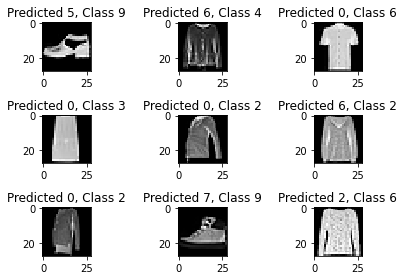

In [65]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found " + str(len(incorrect)) +" incorrect labels")
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

**8) RAPPORT DE CLASSIFICATION**

In [66]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.76      0.91      0.83      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.86      0.89      0.87      1000
     Class 3       0.92      0.93      0.93      1000
     Class 4       0.91      0.80      0.85      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.82      0.73      0.77      1000
     Class 7       0.95      0.99      0.97      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000

